In [107]:
import matplotlib.pyplot as plt

# –ß—Ç–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞
with open('var_16_lognorm.csv', 'r') as f:
    data = [float(line.strip()) for line in f.readlines()]

–ó–¥–µ—Å—å –±—É–¥–µ—Ç –ø–æ–ø—ã—Ç–∫–∞ –ø–æ–ª—É—á–∏—Ç—å —Ç–µ –∂–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –æ–±—Ä–µ–∑–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏

In [108]:
# creating class for Data
class Statistics:
    def __init__(self, data: list, name: str):
        self.dataName = name
        self.dataArr = data
        self.dataLen = len(data)
        self.getAllParams()
        
    def dataSum(self):
        self.sum = sum(self.dataArr)
        return self.sum
    
    def dataMean(self):
        summ = self.dataSum()
        self.mean = summ / self.dataLen
        return self.mean
    
    def dataMedian(self):
        sortedData = sorted(self.dataArr)
        if self.dataLen % 2 == 0:
            # –µ—Å–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ —á–µ—Ç–Ω–æ–µ, –±–µ—Ä–µ–º —Å—Ä–µ–¥–Ω–µ–µ –¥–≤—É—Ö —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π
            mid = self.dataLen // 2
            self.median = (sortedData[mid-1] + sortedData[mid]) / 2
        else:
            # –µ—Å–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –Ω–µ—á–µ—Ç–Ω–æ–µ, –±–µ—Ä–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
            self.median = sortedData[self.dataLen//2]
        return self.median
    
    def dataModa(self):
        # –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å, –≥–¥–µ –∫–ª—é—á–∏ - —ç–ª–µ–º–µ–Ω—Ç—ã —Å–ø–∏—Å–∫–∞, –∞ –∑–Ω–∞—á–µ–Ω–∏—è - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ö –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π
        countDict = {}
        for i in self.dataArr:
            if i in countDict:
                countDict[i] += 1
            else:
                countDict[i] = 1
        # –ù–∞—Ö–æ–¥–∏–º —ç–ª–µ–º–µ–Ω—Ç(—ã) —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π
        max_count = max(countDict.values())
        self.modes = []
        for key, value in countDict.items():
            if value == max_count:
                self.modes.append(key)

        # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –º–æ–¥—É(—ã)
        return self.modes
    
    def dataRange(self):
        self.range = max(self.dataArr) - min(self.dataArr)
        return self.range
    
    def dataBiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.biasedVariance = squared_differences_sum / (self.dataLen)
        return self.biasedVariance
    
    def dataUnbiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.unbiasedVariance = squared_differences_sum / (self.dataLen - 1)
        return self.unbiasedVariance
    
    def dataStartMoment(self, k):
        moment = sum([x**k for x in self.dataArr])/self.dataLen
        return moment
    
    def dataCenterMoment(self, k):
        mean = self.dataMean()
        moment = sum([(x - mean) ** k for x in self.dataArr])/self.dataLen
        return moment
    
    def getAllParams(self):
        self.dataSum()
        self.dataMean()
        self.dataMedian()
        self.dataModa()
        self.dataRange()
        self.dataBiasedVariance()
        self.dataUnbiasedVariance()

    def printAllParams(self, printStats:bool = False, printGraphics:bool = False):
        self.getAllParams()
        print('='*100)
        print(f"Statistics for data: {self.dataName}")

        if printStats:
            print("Data mean is", self.mean)
            print("Data median is", self.median)
            print("Data moda is", self.modes)
            print("Data range is", self.range)
            print("Data Biased Variance is", self.biasedVariance)
            print("Data Unbiased Variance is", self.unbiasedVariance)
            print("Data start moment is", self.dataStartMoment(2))
            print("Data center moment is", self.dataCenterMoment(2))

        if printGraphics:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(self.dataArr, bins=range(int(min(self.dataArr)), int(max(self.dataArr)), 1), density=True)

            # –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
            ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
            ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
            ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')

            # –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
            plt.show()
        print('='*100)
   
    def histogramm(self, columns:int=20, printMPL:bool = False):
        data_array = sorted(self.dataArr)
        data_min = min(data_array)
        data_max = max(data_array)
        data_range = data_max-data_min
        data_step = data_range/columns
        data_cpy = data_array.copy()
        data_columns = [[] for i in range(columns)]
        data_tmp = data_min
        for column_number in range(columns):
            elem_to_delete = []
            for i in range(len(data_cpy)):
                if data_cpy[i] >= data_tmp and data_cpy[i] < data_tmp + data_step:
                    data_columns[column_number].append(data_cpy[i])
                    elem_to_delete.append(data_cpy[i])
            for el in elem_to_delete:
                data_cpy.remove(el)
            data_tmp += data_step
        
        if(len(data_cpy) > 0):
            for i in range(len(data_cpy)):
                data_columns[-1].append(data_cpy[i])

        data_columns_probability = [len(i) for i in data_columns]
        
        max_prob = max(data_columns_probability)
        if max_prob == 0:
            return # –Ω–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–π, –Ω–µ—á–µ–≥–æ –≤—ã–≤–æ–¥–∏—Ç—å

        column_width = 14
        string_down = "\033[30m\033[47m{:>6}‚ïö".format(0)
        string_down += '‚ïê' * column_width * (columns+1) + "‚ñ∫ –ó–Ω–∞—á–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã "
        str_len = len(string_down)

        str_tmp = "\033[30m\033[47m      " + " "*column_width * (columns//2) +"–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –≤—ã–±–æ—Ä–∫–∏" 
        print(str_tmp + " " *(str_len-len(str_tmp)))
        str_tmp = " –í—Å—Ç—Ä–µ—Ç–∏–ª–æ—Å—å "
        print(str_tmp + " " *(str_len-len(str_tmp)-10))
        str_tmp = "—Ä–∞–∑ –≤ –≤—ã–±–æ—Ä–∫–µ"
        print(str_tmp + " " *(str_len-len(str_tmp)-10))
        print("      ‚ñ≤" + " " * (str_len-17))
        print("      ‚ïë" + " " * (str_len-17))
        
        additional_step = 1
        if max_prob > 50:
            additional_step = 5
        if max_prob > 100:
            additional_step = 10
        y_max = (max_prob//additional_step + 1 )*(additional_step)
        for y in range(0, y_max, additional_step):
            
            string = "\033[30m\033[47m{:>6}‚ïë".format(y_max - y)
            string += ' ' * (column_width//2)
            for i in range(columns):
                if(data_columns_probability[i] >= y_max - y):
                    string += '\033[36m\033[47m‚ñà' * column_width
                elif(data_columns_probability[i] >= 1 and (y_max - y) <= additional_step):
                    string += '\033[36m\033[47m‚ñÑ' * column_width
                else:
                    string += '\033[36m\033[47m ' * column_width
            string += ' ' * 37
            print(string)
        # string_down = "\033[30m\033[47m{:>6}‚ïö".format(0)
        # string_down += '‚ïê' * column_width * (columns+1) + "‚ñ∫ –ó–Ω–∞—á–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã "
                    
        print(string_down)
        X_axes_str = [data_min + data_step * i for i in range(columns+1)]
        string_down2 = "       "
        for i in X_axes_str:
            string_down2 += "{:^14.2f}".format(i) 
        string_down2 += " "*30
        print(string_down2)

        if printMPL:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(data_array, bins=columns)

            # –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
            ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
            ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
            ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')

            # –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
            plt.show()
        

classedOldData = Statistics(data, 'Read data')
classedOldData.printAllParams(printStats= True)

data_unbias = [data[i] - min(data) + 0.01 for i in range(len(data))]
classedUnbiasedData = Statistics(data_unbias, 'Unbiased Read data')
classedUnbiasedData.printAllParams(printStats= True)

Statistics for data: Read data
Data mean is 403173.42907651357
Data median is 9.5922675
Data moda is [8.98]
Data range is 67609309.661269
Data Biased Variance is 22862010778114.184
Data Unbiased Variance is 22938472352622.926
Data start moment is 23024559592027.523
Data center moment is 22862010778114.184
Statistics for data: Unbiased Read data
Data mean is 403164.45907651325
Data median is 0.6222674999999998
Data moda is [0.01]
Data range is 67609309.661269
Data Biased Variance is 22862010778114.184
Data Unbiased Variance is 22938472352622.926
Data start moment is 23024552359176.625
Data center moment is 22862010778114.184


$$–í—ã–±–æ—Ä–æ—á–Ω–∞—è \space(—ç–º–ø–∏—Ä–∏ÃÅ—á–µ—Å–∫–∞—è)\space —Ñ—ÉÃÅ–Ω–∫—Ü–∏—è\space —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µÃÅ–Ω–∏—è\space –≤\space –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–π\space —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ\space ‚Äî\\\space —ç—Ç–æ\space –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ\space —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–π\space —Ñ—É–Ω–∫—Ü–∏–∏\space —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è,\space –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–µ \space —Å –ø–æ–º–æ—â—å—é\space –≤—ã–±–æ—Ä–∫–∏\space –∏–∑\space –Ω–µ–≥–æ.$$
$$ –ü—É—Å—Ç—å\space X_{1},\ldots ,X_{n}\space ‚Äî \space–≤—ã–±–æ—Ä–∫–∞\space –æ–±—ä—ë–º–∞\space n ,\space –ø–æ—Ä–æ–∂–¥—ë–Ω–Ω–∞—è \space—Å–ª—É—á–∞–π–Ω–æ–π\space –≤–µ–ª–∏—á–∏–Ω–æ–π \space X, \space –∑–∞–¥–∞–≤–∞–µ–º–æ–π \space —Ñ—É–Ω–∫—Ü–∏–µ–π \space —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è \space F(x) $$
$$ –ë—É–¥–µ–º\space —Å—á–∏—Ç–∞—Ç—å, \space —á—Ç–æ \space X_{i},\space –≥–¥–µ\space i \in \{1, n\}, \space n\in \N \space‚Äî \space–Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ\space —Å–ª—É—á–∞–π–Ω—ã–µ \space–≤–µ–ª–∏—á–∏–Ω—ã,\\
–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ \space –Ω–∞\space –Ω–µ–∫–æ—Ç–æ—Ä–æ–º\space –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ \space —ç–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—ã—Ö \space –∏—Å—Ö–æ–¥–æ–≤ \space \Omega $$
$$ –ü—É—Å—Ç—å \space x \in \R. \space –û–ø—Ä–µ–¥–µ–ª–∏–º \space —Ñ—É–Ω–∫—Ü–∏—é \space \hat{F}(x) \space —Å–ª–µ–¥—É—é—â–∏–º\space –æ–±—Ä–∞–∑–æ–º: $$ 
$$ \hat{F}(x) = \frac{1}{n}\sum_{i=1}^{n}\theta (x-X_{i}), \space –≥–¥–µ $$
$$ \theta (x)={\begin{cases}0,&x<0;\\1,&x\geqslant 0.\end{cases}}\space  ‚Äî\space  –§—É–Ω–∫—Ü–∏—è \space –•–µ–≤–∏—Å–∞–π–¥–∞  $$


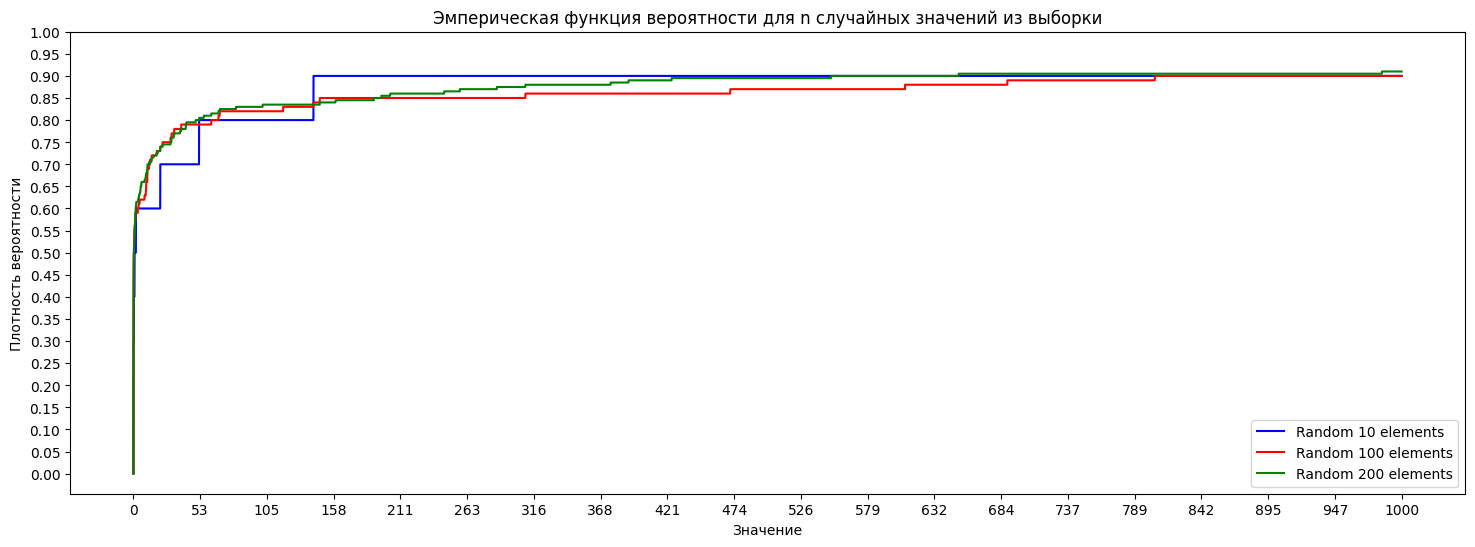

In [109]:
# –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏

import numpy as np
import random as rnd

def Heviside(x):
    if(x<0):
        return 0
    return 1

def f_hat(x, dataSet: Statistics):
    s = 0
    for xi in sorted(dataSet.dataArr):
        s += Heviside(x-xi)
    return s/dataSet.dataLen

def getRandomArr(dataSet: Statistics, len):
    result= rnd.sample(dataSet.dataArr, len)
    return result

dataRand_10 = getRandomArr(classedUnbiasedData, 10)
classedRandData_10 = Statistics(dataRand_10, 'Random 10 elements')
dataRand_100 = getRandomArr(classedUnbiasedData, 100)
classedRandData_100 = Statistics(dataRand_100, 'Random 100 elements')
dataRand_200 = getRandomArr(classedUnbiasedData, 200)
classedRandData_200 = Statistics(dataRand_200, 'Random 200 elements')

right_border = 1000 # –ø–æ—Å—Ç–∞–≤–∏—Ç—å 20–∫ –∏–ª–∏ 200–∫ –¥–ª—è –¥–∞–ª—å–Ω–µ–≥–æ –≤–∏–¥–∞
left_border = 0
X = np.linspace(0.001 + left_border,right_border, num=10000)
# step = 100
# X = [a/step for a in range(0, 100*step)]
Y_10 = [f_hat(a, classedRandData_10) for a in X]
Y_100 = [f_hat(a, classedRandData_100) for a in X]
Y_200 = [f_hat(a, classedRandData_200) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_10, color='blue', label=f'{classedRandData_10.dataName}')
ax.plot(X, Y_100, color='red', label=f'{classedRandData_100.dataName}')
ax.plot(X, Y_200, color='green', label=f'{classedRandData_200.dataName}')

xt = np.linspace(left_border, right_border, num=20)
yt = [a/100 for a in range(0, 101, 5)]
ax.set_xticks(xt)
ax.set_yticks(yt)
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title('–≠–º–ø–µ—Ä–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è n —Å–ª—É—á–∞–π–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑ –≤—ã–±–æ—Ä–∫–∏')
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()

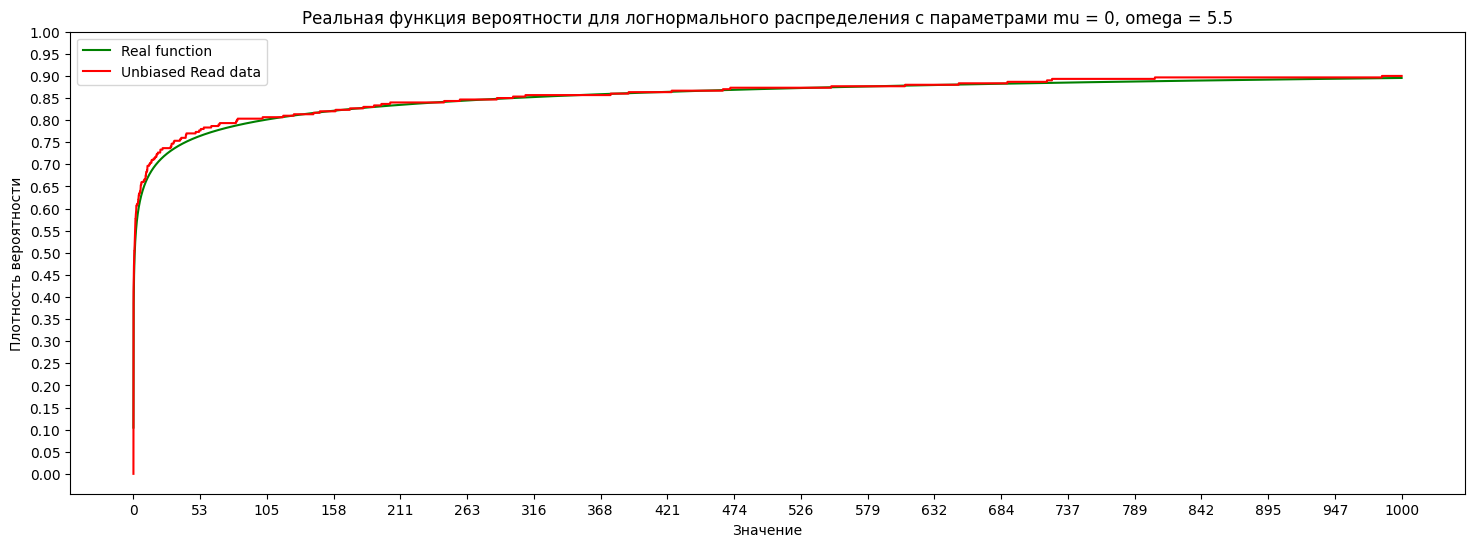

In [110]:
# —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
import scipy as scp

def F_real(x, mu, sco, bias = 0):
    res = 1/2 + (scp.special.erf((np.log(x-bias)-mu)/(sco*(2**0.5))))/2
    return res

mu = 0
sco = 5.5
Y_real = [F_real(x, mu, sco) for x in X]

# bias = 8.9
# X_biased = np.linspace(0.001+bias+left_border,right_border, num=10000)
# Y_real_biased = [F_real(x, mu, sco, bias) for x in X_biased]

Y_read = [f_hat(a, classedUnbiasedData) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'Real function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')
# ax.plot(X_biased, Y_real_biased, color='blue', label=f'Real biassed function')
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–†–µ–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ mu = {mu}, omega = {sco}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()

In [111]:
  
# somedata = [rnd.randint(0, 100) for i in range (100)]
# classedReallyRandomData = Statistics(somedata, name="Really random data")
# classedReallyRandomData.histogramm(columns=10)

# classedRandData_10.histogramm(columns=10);
# classedRandData_100.histogramm(columns=10);
# classedRandData_200.histogramm(columns=10);


6. –ü–æ–Ω—è—Ç–∏–µ —Ç–æ—á–µ—á–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫.  
    1. –û—Ü–µ–Ω–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ –º–µ—Ç–æ–¥–æ–º –º–æ–º–µ–Ω—Ç–æ–≤.   
    2. –û—Ü–µ–Ω–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ –º–µ—Ç–æ–¥–æ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è.  
    3. –ü—Ä–∏–≤–µ—Å—Ç–∏ –∏ –æ–±–æ—Å–Ω–æ–≤–∞—Ç—å —Å–≤–æ–π—Å—Ç–≤–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫: –Ω–µ—Å–º–µ—â–µ–Ω–Ω–æ—Å—Ç—å, —Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å, R-—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.   
    4. –ù–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å:  
        1.   —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –æ—Ü–µ–Ω–∫–∞–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –Ω–∞–π–¥–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º –º–æ–º–µ–Ω—Ç–æ–≤;  
        2.   —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –æ—Ü–µ–Ω–∫–∞–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –Ω–∞–π–¥–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è;  
        3.   —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–ø–æ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ). –ü–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ –¥–æ–ª–∂–µ–Ω —Å–æ–¥–µ—Ä–∂–∞—Ç—å –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ, –ø–æ–¥–ø–∏—Å—å –æ—Å–µ–π, –ª–µ–≥–µ–Ω–¥—É.  
    5. –ó–∞–Ω–µ—Å—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∏ –≥—Ä–∞—Ñ–∏–∫ –≤ –æ—Ç—á–µ—Ç.  
    6. –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –∑–Ω–∞—á–µ–Ω–∏–∏ –æ—Ü–µ–Ω–æ–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ —Å—Ö–æ–∂–µ—Å—Ç–∏ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–π –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏—Ö —Ñ—É–Ω–∫—Ü–∏–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.  

mu = 10.430408561260634 ; sco = 2.2256195916920802
mu = 2.666062405434957 ; sco = 1.525978107108208


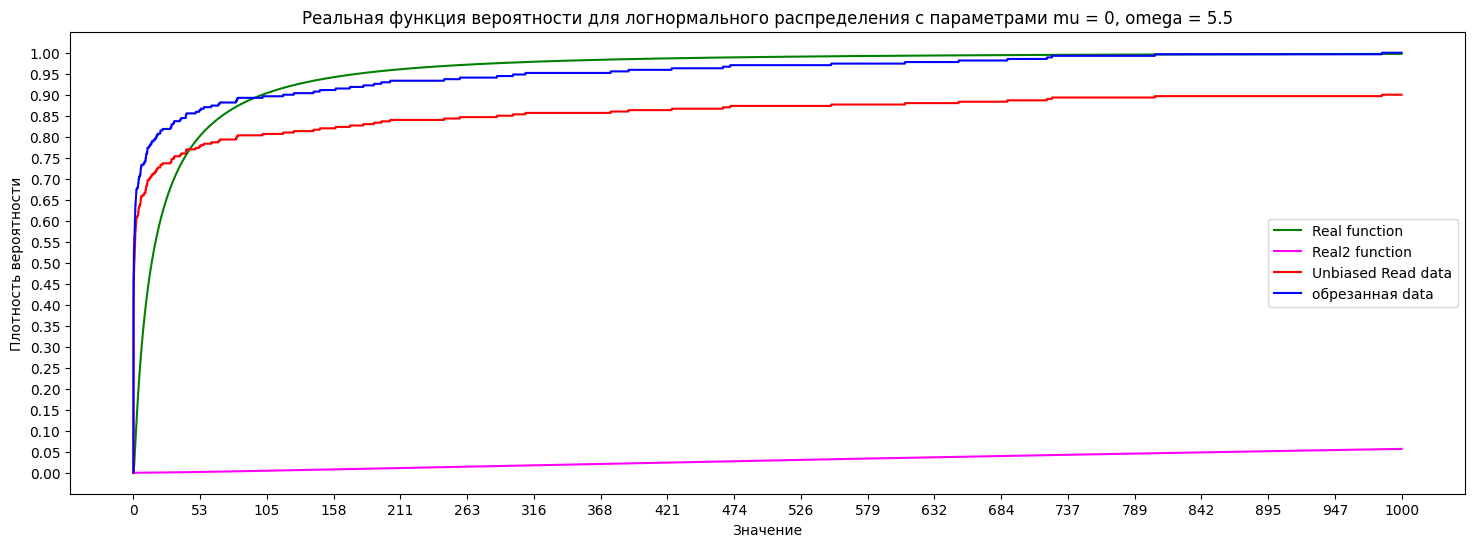

In [112]:
# –º–µ—Ç–æ–¥ –º–æ–º–µ–Ω—Ç–æ–≤
def realMomentStartPowK(K, mu, sco):
    return np.e ** (K * mu + K*K*sco*sco/2)

def momentMethod(dataSet: Statistics):
    # E(X) = mean(X)
    # E(X^2) = mean(X^2)
    # mu + sco^2 / 2 = ln(mX)
    # 2mu + sco^2 * 2 = ln(mX^2)  
    # sco = sqrt(ln(mX^2)-2ln(mX))
    # mu = 2ln(mX)-0.5ln(mX^2)
    mX = dataSet.dataStartMoment(1)
    mX2 = dataSet.dataStartMoment(2)
    mu = 2 * np.log(mX) - 0.5 * np.log(mX2)
    sco = np.sqrt(np.log(mX2) - 2 * np.log(mX))
    print('mu =', str(mu), '; sco =', str(sco))

momentMethod(classedUnbiasedData)
data_new = sorted(data_unbias)[:270]
classedNewDat = Statistics(data_new, '–æ–±—Ä–µ–∑–∞–Ω–Ω–∞—è data')
momentMethod(classedNewDat)

Y_real = [F_real(x, 2.6656494676596054, 1.5261064768969346) for x in X]
Y_real2 = [F_real(x, 10.430408511828189, 2.225619602758065) for x in X]
Y_read = [f_hat(a, classedUnbiasedData) for a in X]
Y_read2 = [f_hat(a, classedNewDat) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'Real function')
ax.plot(X, Y_real2, color='magenta', label=f'Real2 function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')
ax.plot(X, Y_read2, color='blue', label=f'{classedNewDat.dataName}')
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–†–µ–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ mu = {mu}, omega = {sco}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()



mu = -0.008087627793411323 ; sco = 0.4620523289688257
Statistics for data: test data
Data mean is 1.1036893799877259
Data median is 0.99
Data moda is [0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81]
Data range is 3.31
Data Biased Variance is 0.2899077308121207
Data Unbiased Variance is 0.2899373949613903
Data start moment is 1.5080379783098004
Data center moment is 0.2899077308121207
E(X) = 1.1331484530668263
Median = 1.0
Moda = 0.7788007830714049
D(X) = 0.3646958540123865


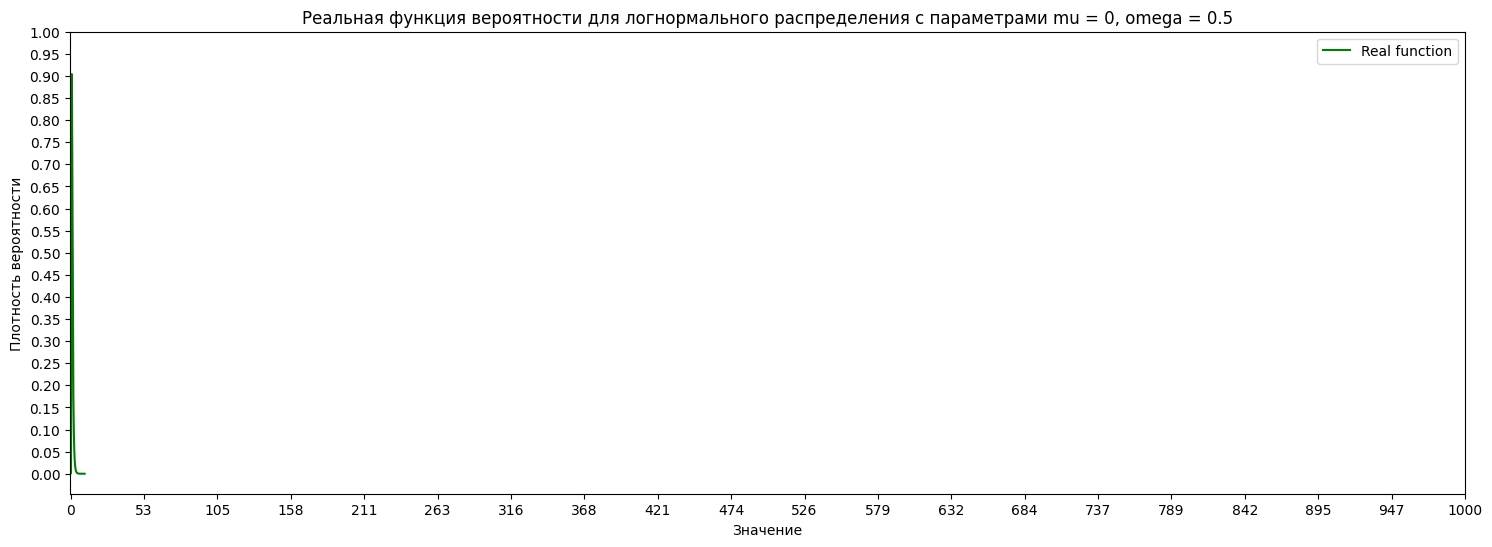

In [113]:
Y_real = []

def func(x, mu, sco):
    a = np.exp(-(((np.log(x)-mu)/sco)**2)/2)
    b = x * sco * np.sqrt(np.pi * 2)
    return a/b

mu = 0
sco = 1/2#np.sqrt(2)
Y_hist = []
for x in range(1, 1000000):
    for kolvo in range(int(100*func(x/100, mu, sco))):
        Y_real.append(x/100)
for x in range(1, 1000):
    Y_hist.append((func(x/100, mu, sco)))

classedNewDat = Statistics(Y_real, 'test data')
momentMethod(classedNewDat)
classedNewDat.printAllParams(printStats= True);

print('E(X) =', str(np.exp(mu+sco*sco/2)))
print('Median =', str(np.exp(mu)))
print('Moda =', str(np.exp(mu-sco*sco)))
print('D(X) =', str(np.exp(2*mu+sco*sco)*(np.exp(sco*sco)-1)))

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot([x/100 for x in range(1, 1000)], Y_hist, color='green', label=f'Real function')
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–†–µ–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ mu = {mu}, omega = {sco}')
# xt = np.linspace(0, 10, num=40)
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()


In [121]:
# –º–µ—Ç–æ–¥ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è
mu = sum([np.log(classedUnbiasedData.dataArr[i]) for i in range (len(classedUnbiasedData.dataArr))])/len(classedUnbiasedData.dataArr)
s—Åo2 = sum([(np.log(classedUnbiasedData.dataArr[i])-mu)**2 for i in range (len(classedUnbiasedData.dataArr))])/len(classedUnbiasedData.dataArr)
s—Åo = np.sqrt(s—Åo2)
print(mu, s—Åo)

0.34950075364905747 4.7866447473536935


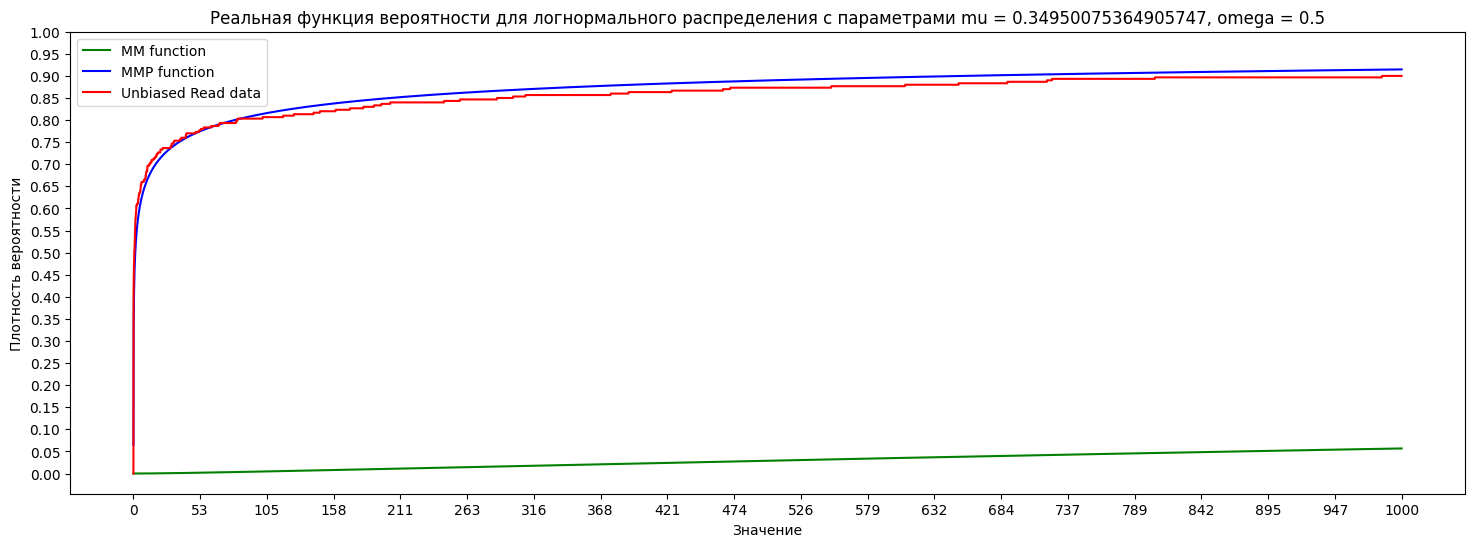

In [122]:
Y_real = [F_real(x, 10.430408511828189, 2.225619602758065) for x in X]
Y_real2 = [F_real(x, 0.34950075364905747, 4.7866447473536935) for x in X]
Y_read = [f_hat(a, classedUnbiasedData) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'MM function')
ax.plot(X, Y_real2, color='blue', label=f'MMP function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–†–µ–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ mu = {mu}, omega = {sco}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()

# –≤—ã–≤–æ–¥ - –ú–ú —Ö—É–µ—Ç–∞

7. –ü–æ–Ω—è—Ç–∏–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫. 
    1. –û—Ü–µ–Ω–∏—Ç—å  –ø–∞—Ä–∞–º–µ—Ç—Ä—ã  —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è  –≤—ã–±–æ—Ä–∫–∏  —Å  –ø–æ–º–æ—â—å—é  –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω–æ–π  –æ—Ü–µ–Ω–∫–∏  —Å —É—Ä–æ–≤–Ω—è–º–∏ –¥–æ–≤–µ—Ä–∏—è ùõæ1=0,95, ùõæ2=0,99  
    2. –ó–∞–Ω–µ—Å—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤ –æ—Ç—á–µ—Ç. 
    3. –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –±–ª–∏–∑–æ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã—Ö –∏ —Ç–æ—á–µ—á–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫